<a href="https://colab.research.google.com/github/rheta-arashi/colab/blob/main/FinalProjectHRANALYTICS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HUMAN RESOURCE ANALYTICS**

## **BUSINESS UNDERSTANDING**

Optimizing employee promotions in a company is one of the very important aspects of human resource best practices. This exploratory data analysis is crucial for human resource management to ensure a fair and efficient promotion process. It helps identify high-potential employees, address any biases, and allocate resources effectively for training and development programs. Additionally, it contributes to a motivated workforce and ultimately leads to improved retention rates and overall organizational success.

## **DATA UNDERSTANDING**

### **Reading in the data**

In [ ]:
# importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from google.colab import files
import io

In [ ]:
# uploading the data

data_df = files.upload()

Saving hrdata_combined.csv to hrdata_combined.csv


In [ ]:
# decoding the data to a pandas dataframe

df = pd.read_csv(io.BytesIO(data_df['hrdata_combined.csv']))

In [ ]:
# checking the first few rows of the data

df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [ ]:
# checking the columns and shape of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 8.4+ MB


This DataFrame contains information on 78,298 employees. It consists of 14 columns providing details such as employee ID, department, region, education level, gender, recruitment channel, number of trainings attended, age, previous year performance rating, length of service, whether key performance indicators (KPIs) were met (>80%), whether awards were won, average training score, and a promotion indicator.

### **Data cleaning and wrangling**

In this section, emphasis will be given to :

* Checking and Dealing with missing values

* Checking for and Dealing with duplicated values

* Checking if dataset has appropriate(expected) data types for each of the columns





In [ ]:
# checking for missing values in the dataset for each of the columns

missing_percent = (df.isna().sum() / len(df)) * 100

missing_percent

employee_id              0.000000
department               0.000000
region                   0.000000
education                4.397303
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating     7.581292
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted             30.000766
dtype: float64

All the columns do not have missing values except for **education** which has around 4% of the data missing, **previous_year rating** which has around 8% and **is_promoted** which has around 30% of the data missing

In this case, **all rows with missing values will be dropped**

In [ ]:
# dropping all rows with missing values

df = df.dropna()

In [ ]:
# checking for any duplicated rows in the data

df.duplicated().sum()

0

There are **no duplicated rows** in the dataset

In [ ]:
# checking if the dataset has the expected data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  KPIs_met >80%         48660 non-null  int64  
 11  awards_won?           48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 5.6+ MB


It is evident that **all columns except the awards won, KPI's_met and is_promoted** columns have the right data types. In this case, **these two columns will be converted to object types and 0 mapped to 'No' and 1 mapped to 'Yes'**

In [ ]:
# converting columns to object and mapping 0 to No and 1 to Yes
df['awards_won?'] = df['awards_won?'].astype('object')
df['is_promoted'] = df['is_promoted'].astype('object')
df['awards_won?'] = df['awards_won?'].map({0: 'No', 1: 'Yes'})
df['is_promoted'] = df['is_promoted'].map({0: 'No', 1: 'Yes'})
df['KPIs_met >80%'] = df['KPIs_met >80%'].map({0: 'No', 1: 'Yes'}).astype('object')


## **EXPLORATORY DATA ANALYSIS**

In [ ]:
# summary statistics of the dataset

df.describe(include="all")

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660,48660,48660,48660,48660,48660.000000,48660.000000,48660.000000,48660.00000,48660,48660,48660.000000,48660
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,2,2,NaN,2
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,No,No,NaN,No
freq,NaN,14239,10811,33404,33852,27017,NaN,NaN,NaN,NaN,31314,47534,NaN,44428
mean,39169.271681,NaN,NaN,NaN,NaN,NaN,1.251993,35.589437,3.337526,6.31157,NaN,NaN,63.603309,NaN
std,22630.461554,NaN,NaN,NaN,NaN,NaN,0.604994,7.534571,1.257922,4.20476,NaN,NaN,13.273502,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.00000,NaN,NaN,39.000000,NaN
25%,19563.500000,NaN,NaN,NaN,NaN,NaN,1.000000,30.000000,3.000000,3.00000,NaN,NaN,51.000000,NaN
50%,39154.000000,NaN,NaN,NaN,NaN,NaN,1.000000,34.000000,3.000000,5.00000,NaN,NaN,60.000000,NaN
75%,58788.250000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,8.00000,NaN,NaN,76.000000,NaN


For the continuous variables, the average age is approximately 36 years with a standard deviation of around 7.5, indicating some variability in ages. The average length of service is about 6 years, with a standard deviation of approximately 4.2, suggesting a range of experience levels among employees. The average previous year performance rating is approximately 3.3, with a standard deviation of around 1.3, implying varying levels of performance. The average number of training sessions attended is around 1.3, with a standard deviation of about 0.6, indicating some diversity in training participation. For the categorical variables, there are 9 different departments and 34 unique regions represented. Education levels have 3 categories, with 'Bachelor's' being the most common. Gender is represented by two categories, with 'm' being the dominant one. Recruitment channels have 3 distinct options, with 'other' being the most frequently used. The 'awards_won?' has two categories with 'no' being the most frequent while'is_promoted' also has two categories with 'no' being the most frequent. The 'KPIS_met >80%' has two categories with 'no' being the most frequent







### **UNIVARIATE ANALYSIS**

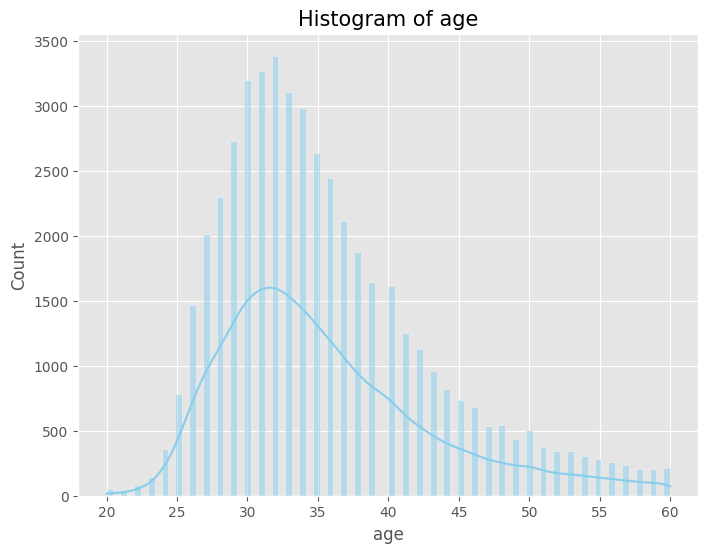

In [ ]:
# distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', kde=True, color='skyblue')
plt.title('Histogram of age', fontsize=15)
plt.show()

As per the histogram, age seems to be normally distributed

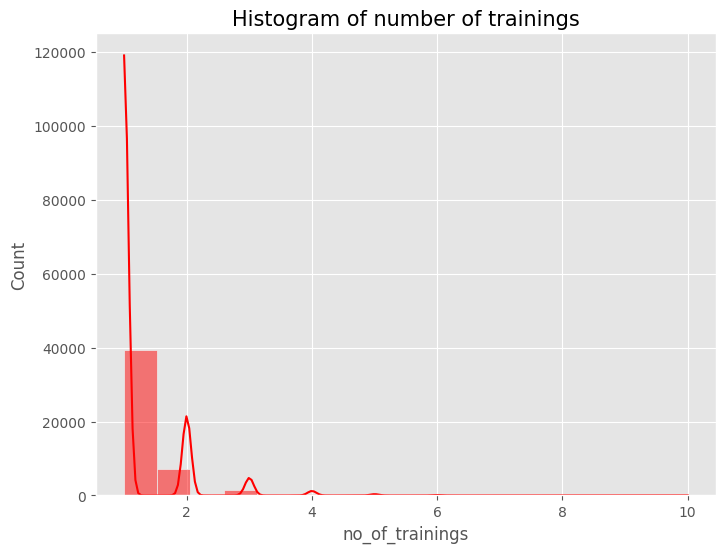

In [ ]:
# distribution of number of trainings

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='no_of_trainings', kde=True, color='red')
plt.title('Histogram of number of trainings', fontsize=15)
plt.show()

As per the histogram, it seems as though number of trainings is positively skewed showing that most people have little or no training

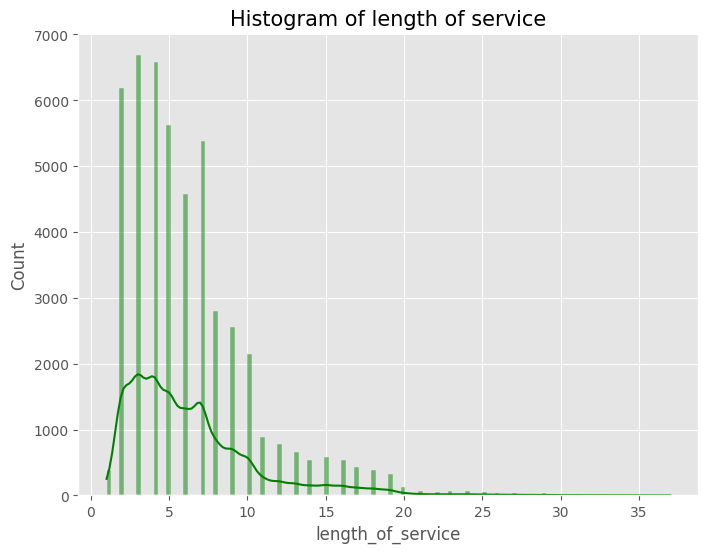

In [ ]:
# distribution of length of service

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='length_of_service', kde=True, color='green')
plt.title('Histogram of length of service', fontsize=15)
plt.show()

Length of service also seems to be positively skewed with only under 1000 people having being at the company for more than 10 years.

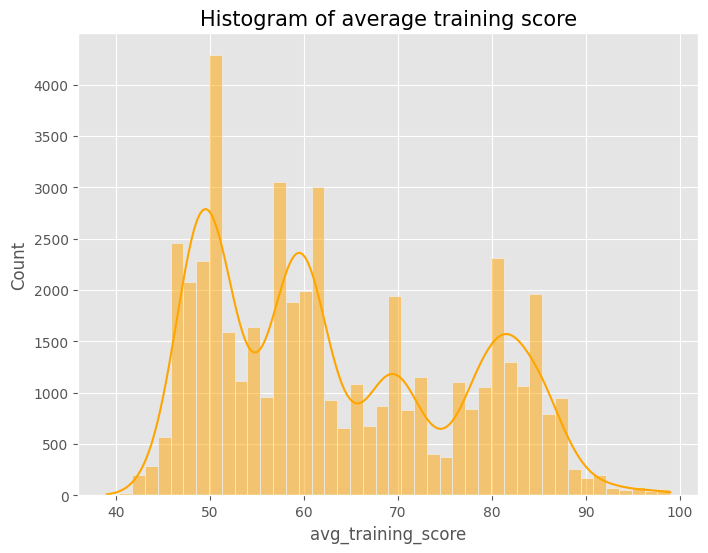

In [ ]:
# distribution of avg training score

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='avg_training_score', kde=True, color='orange')
plt.title('Histogram of average training score', fontsize=15)
plt.show()

Average training score also shows some evidence of normal distribution with majority of people scoring between 50 and 60 percent and only a few people scoring poorly or very well.

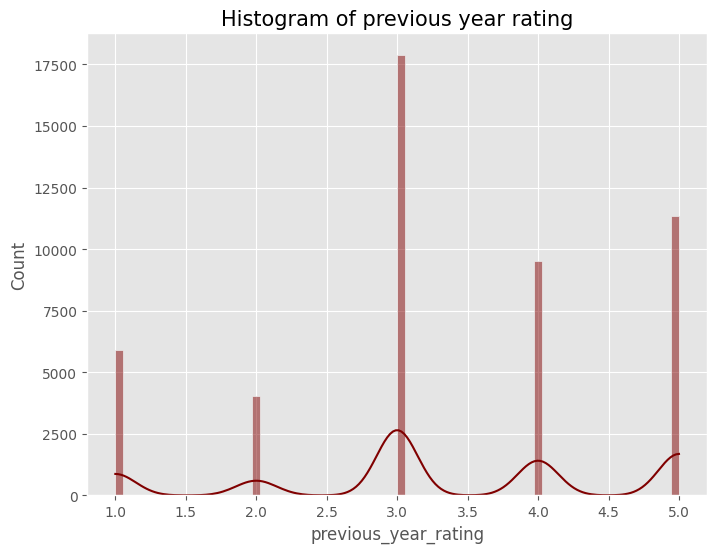

In [ ]:
# distribution of previous year rating

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='previous_year_rating', kde=True, color='maroon')
plt.title('Histogram of previous year rating', fontsize=15)
plt.show()

Similarly, previous year rating shows some signs of negative skewness as most people were rating 3 and above out of 5.

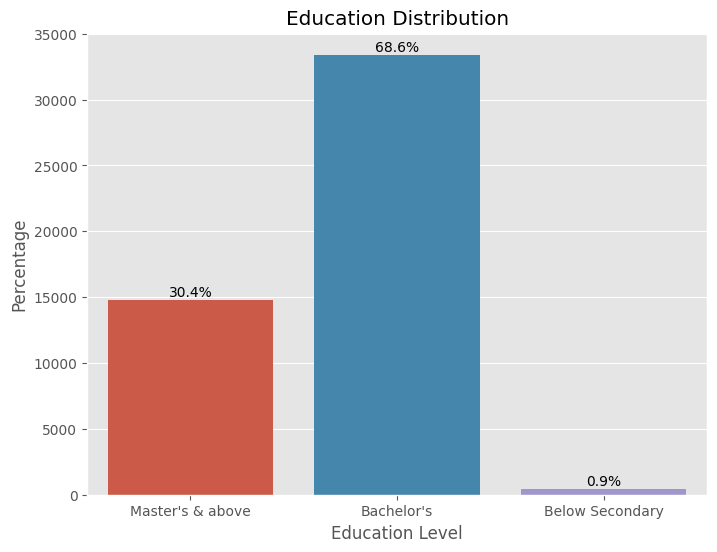

In [ ]:
# education distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='education', data=df)

total_count = len(df)


for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Percentage')

plt.show()


For education, 68% have bachelors, 30% have masters and 0.9% have below secondary

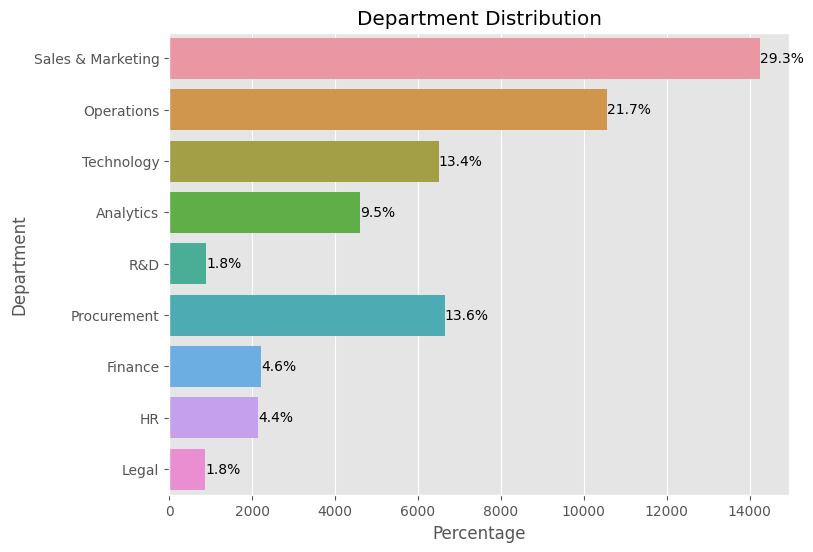

In [ ]:
# department distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='department', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('Department Distribution')
plt.xlabel('Percentage')
plt.ylabel('Department')

plt.show()


The sales and marketing department has the highest number of employees, followed by operations, procurement and technology

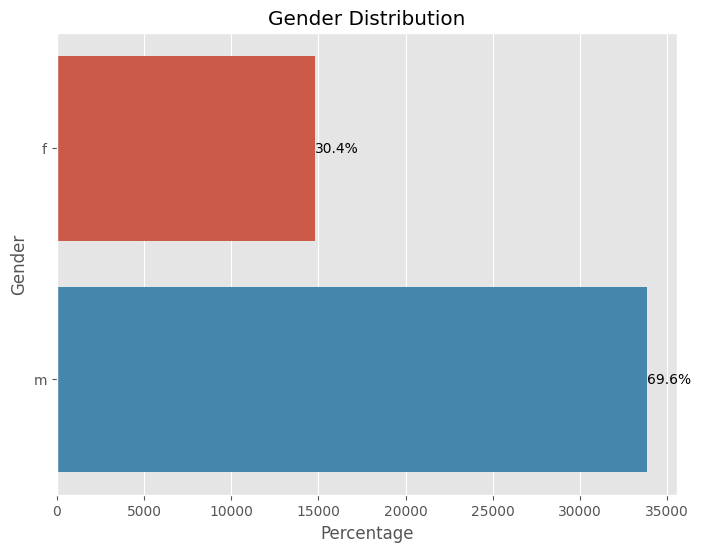

In [ ]:
# gender distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='gender', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('Gender Distribution')
plt.xlabel('Percentage')
plt.ylabel('Gender')

plt.show()

69% of the employees are male while only 30% are female.

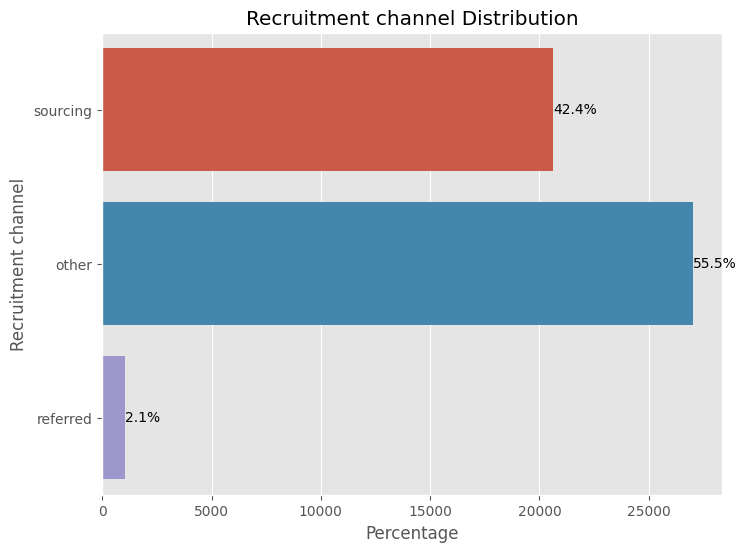

In [ ]:
# recruitment channel distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='recruitment_channel', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('Recruitment channel Distribution')
plt.xlabel('Percentage')
plt.ylabel('Recruitment channel')

plt.show()

Most of the employees were recruited through other(55%) while the least were recruited through referalls(2.1%)

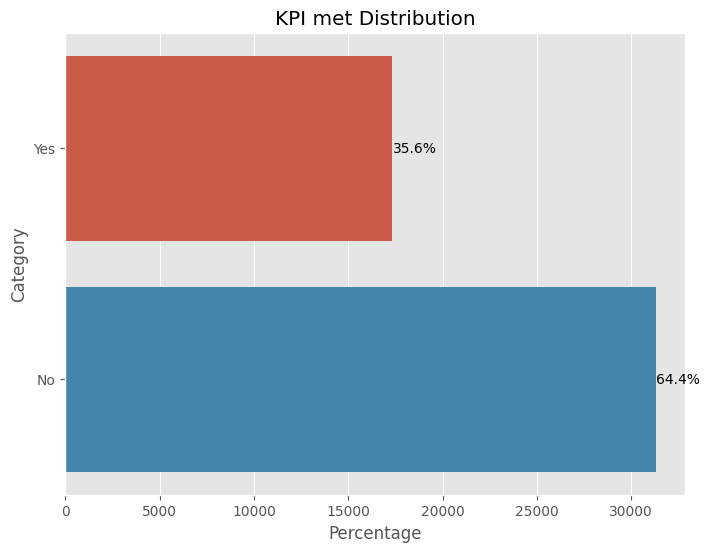

In [ ]:
# KPI's met > 80% distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='KPIs_met >80%', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('KPI met Distribution')
plt.xlabel('Percentage')
plt.ylabel('Category')

plt.show()

Only 35.6% of the employees met their KPI's above 80% while the rest did not

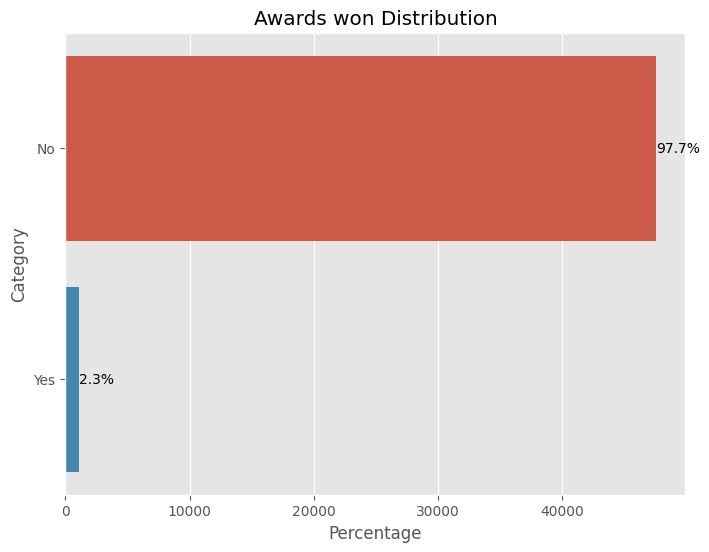

In [ ]:
# Awards won distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='awards_won?', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('Awards won Distribution')
plt.xlabel('Percentage')
plt.ylabel('Category')

plt.show()

Only 2.3% of the people won an award while the others did not.

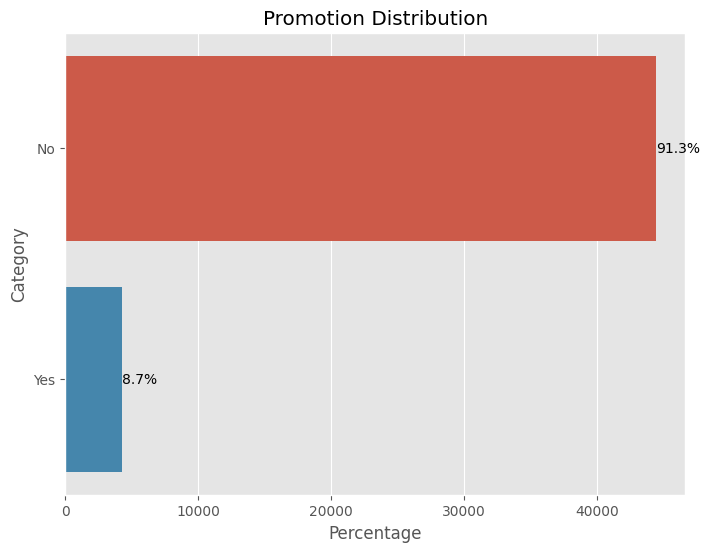

In [ ]:
# Promotion distribution

plt.figure(figsize=(8, 6))
ax = sns.countplot(y='is_promoted', data=df)

total_count = len(df)

for p in ax.patches:
    width = p.get_width()
    percentage = (width / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (width, p.get_y() + p.get_height()/2.), va='center', ha='left', fontsize=10)

plt.title('Promotion Distribution')
plt.xlabel('Percentage')
plt.ylabel('Category')

plt.show()

Only 8.7% of the employees were promoted while 91.3% did not get a promotion.

### **BIVARIATE ANALYSIS**

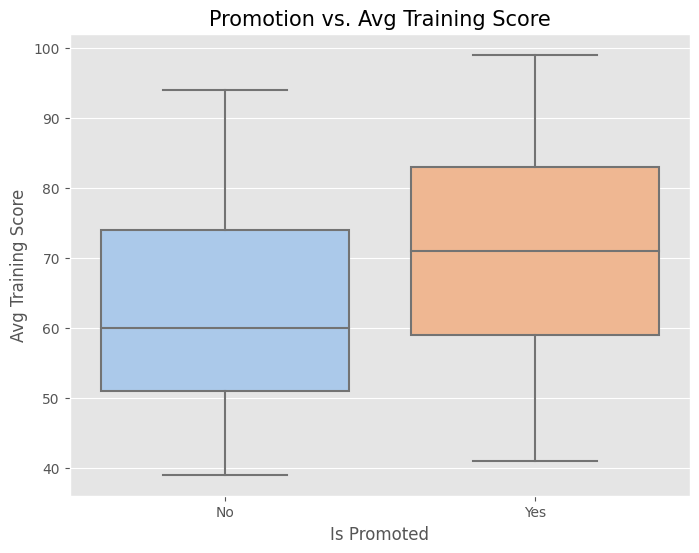

In [ ]:
# promotion vs average training score

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_promoted', y='avg_training_score', palette='pastel')
plt.title('Promotion vs. Avg Training Score', fontsize=15)
plt.xlabel('Is Promoted')
plt.ylabel('Avg Training Score')
plt.show()


It is evident that employees who get promoted on average have higher average training compared to those who are not. From the boxplot, it is evident that the median value of those who are promoted was at 71% while for those who did not get promoted was just above 60%.

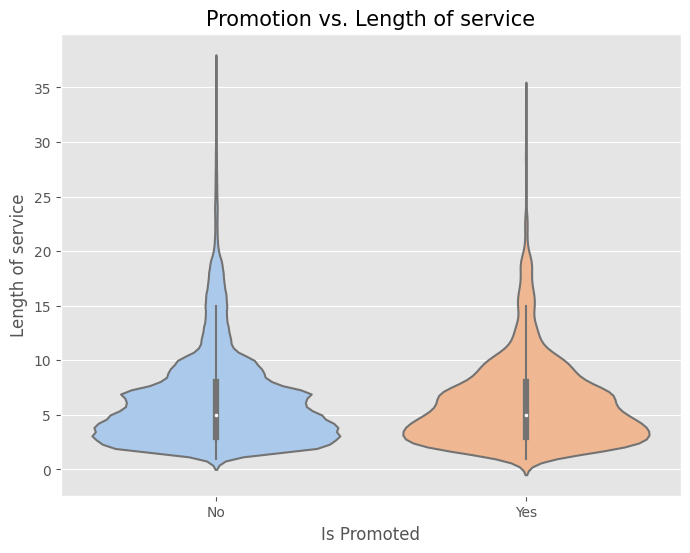

In [ ]:
# promotion vs length of service

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='is_promoted', y='length_of_service', palette='pastel')
plt.title('Promotion vs. Length of service', fontsize=15)
plt.xlabel('Is Promoted')
plt.ylabel('Length of service')
plt.show()


Interestingly, the length of service of an employee does not have a significant different on determining if someone will get promoted or not.

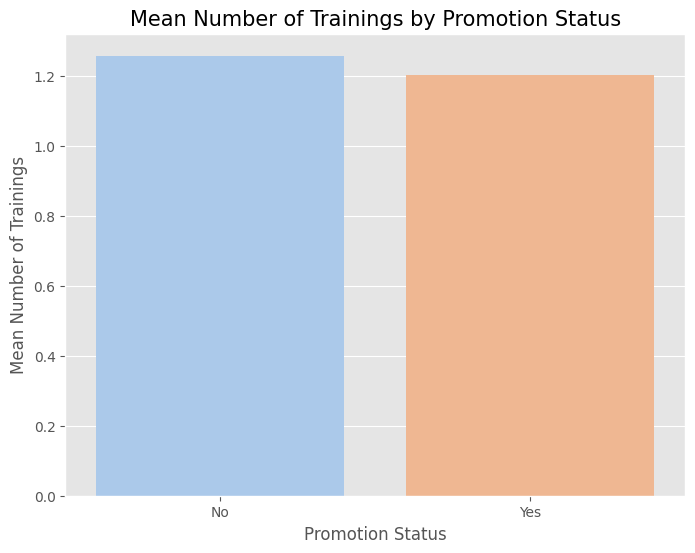

In [ ]:
# Group by 'is_promoted' and calculate the mean of 'no_of_trainings'
training_mean_by_promotion = df.groupby('is_promoted')['no_of_trainings'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=training_mean_by_promotion, x='is_promoted', y='no_of_trainings', palette='pastel')

plt.title('Mean Number of Trainings by Promotion Status', fontsize=15)
plt.xlabel('Promotion Status')
plt.ylabel('Mean Number of Trainings')

plt.show()


There is little to show that the number of trainings an employee attends affects if they get a promotion or not.

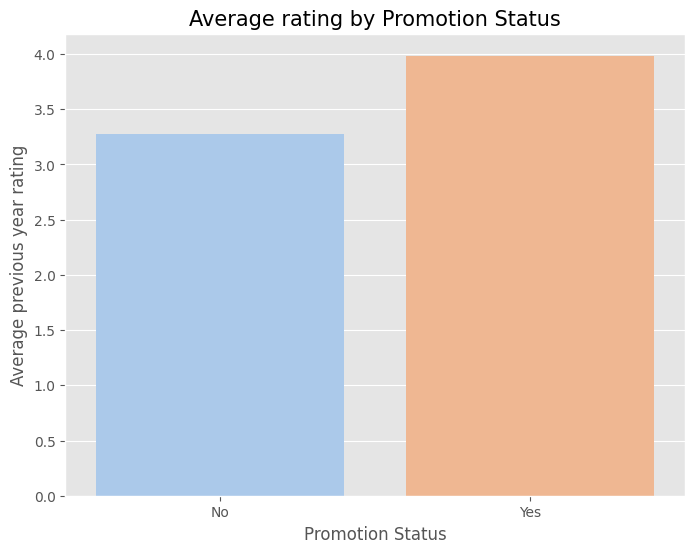

In [ ]:
# Group by 'is_promoted' and calculate the mean of 'previous year rating'
rating_mean_by_promotion = df.groupby('is_promoted')['previous_year_rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=rating_mean_by_promotion, x='is_promoted', y='previous_year_rating', palette='pastel')

plt.title('Average rating by Promotion Status', fontsize=15)
plt.xlabel('Promotion Status')
plt.ylabel('Average previous year rating')

plt.show()

From the graphs it is evident that employee who got promoted averaged higher at 4 out 5 than individuals who did not get promoted who averaged at a lower 3.5 out 5

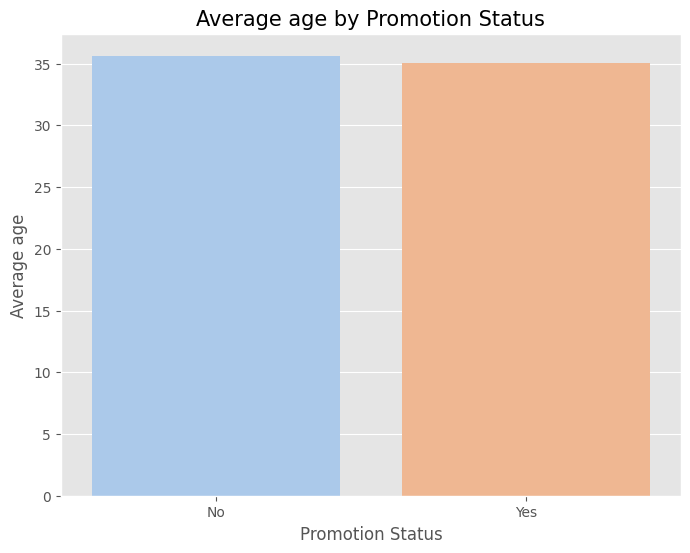

In [ ]:
age_by_promotion = df.groupby('is_promoted')['age'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=age_by_promotion, x='is_promoted', y='age', palette='pastel')

plt.title('Average age by Promotion Status', fontsize=15)
plt.xlabel('Promotion Status')
plt.ylabel('Average age')

plt.show()

According to the barplot, there appears to have little difference between the average age of people who got promote and those who didn't

In [ ]:
# create a finction to plot a promotion percentage for categories

def plot_promotion_percentage(data, column):
    attrition_percentage = (
        data.groupby(column)['is_promoted']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0) * 100
    )

    plt.figure(figsize=(8, 6))

    sns.set_palette("Set1")
    ax = attrition_percentage.plot(kind='bar', stacked=True)

    plt.title(f'Promotion Percentage by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')

    ax.legend(title='promotion', loc='lower right', labels=['No', 'Yes'])

    plt.show()


<Figure size 800x600 with 0 Axes>

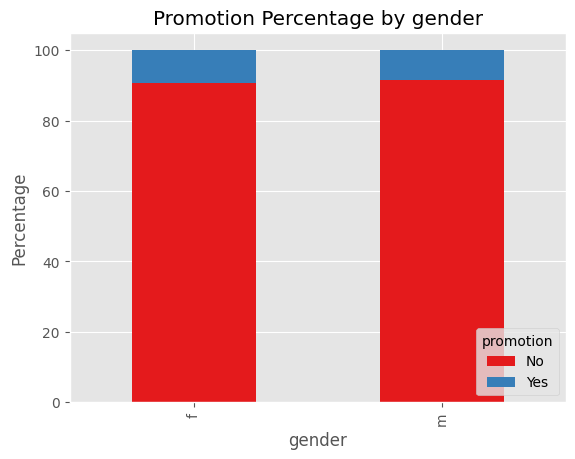

In [ ]:
# promotion vs gender

plot_promotion_percentage(df,'gender')

According to the stacked bar chart above, although female have a slightly higher percentage of promotion, it is not significantly different from those of men.

<Figure size 800x600 with 0 Axes>

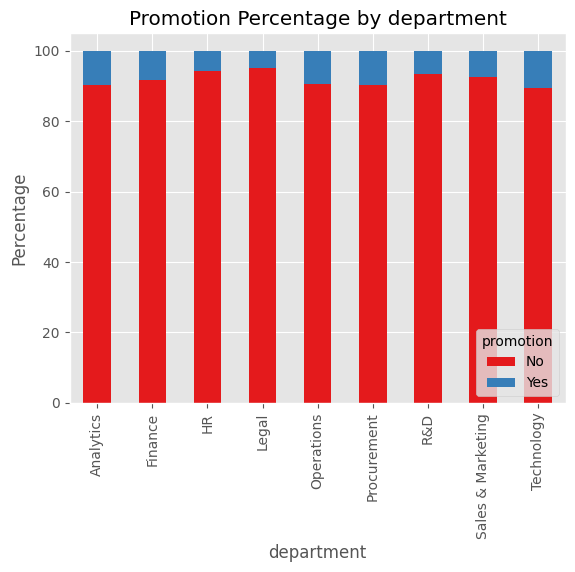

In [ ]:
# promotion vs department

plot_promotion_percentage(df,'department')

Technology, analytics, operations and procurement have the highest percentages of promotions with around more than 10 percent of the employees in those departments getting promotions.

<Figure size 800x600 with 0 Axes>

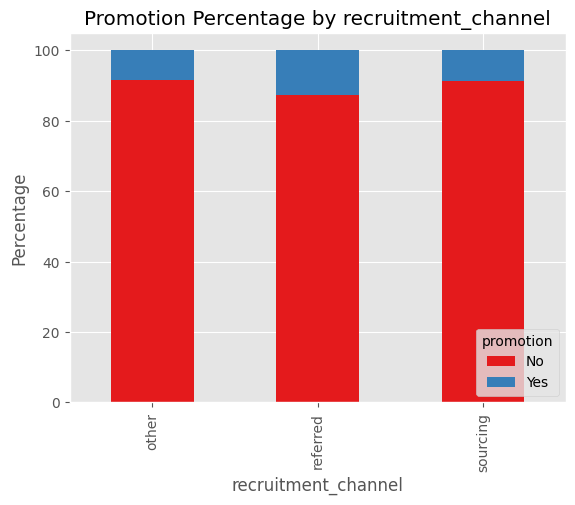

In [ ]:
# promotion vs recruitment channel

plot_promotion_percentage(df,'recruitment_channel')

Referalls led the way with more than 10% of the employees getting promotions compared to other recruitement channels which had less than 10 percent.

<Figure size 800x600 with 0 Axes>

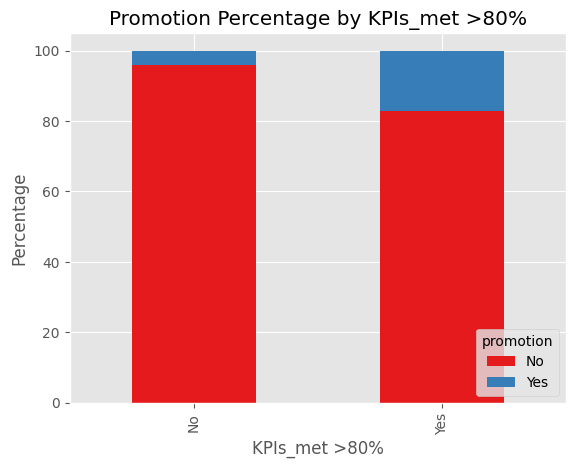

In [ ]:
# promotion vs KPI's met above 80%
plot_promotion_percentage(df,'KPIs_met >80%')

It was evident that hitting KPI's was a major factor determining if an employee would get promoted or not as nearly 20% of the employees who had hit more than 80% of the KPI's recived promotion compared to less than five percent for those who didn't.

<Figure size 800x600 with 0 Axes>

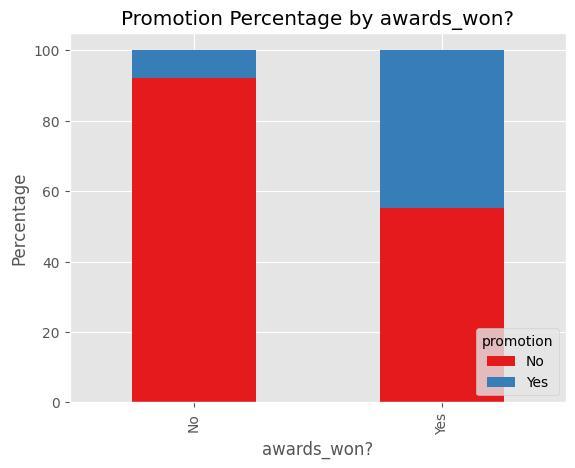

In [ ]:
# promotions vs awards won
plot_promotion_percentage(df,'awards_won?')

'Awards won' had a significantly large effect on whether an employee would get promoted or not with more than 40% of the employees who had won an award getting promotions commpared to less than 5% for those that had not won the award.

### **MULTIVARIATE ANALYSIS**

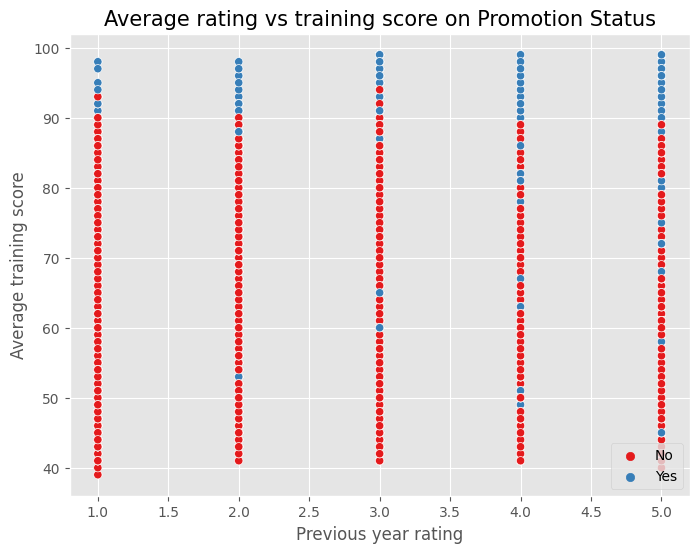

In [ ]:
# avg training score vs rating on promotion status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='previous_year_rating', y='avg_training_score',hue='is_promoted')

plt.title('Average rating vs training score on Promotion Status', fontsize=15)
plt.xlabel('Previous year rating')
plt.ylabel('Average training score')
plt.legend(loc='lower right')

plt.show()

Although there was some outliers, there was a strong indication that average training score had a significant effect on whether someone got promoted or not with majority of those promoted having an average training score of more than 90%

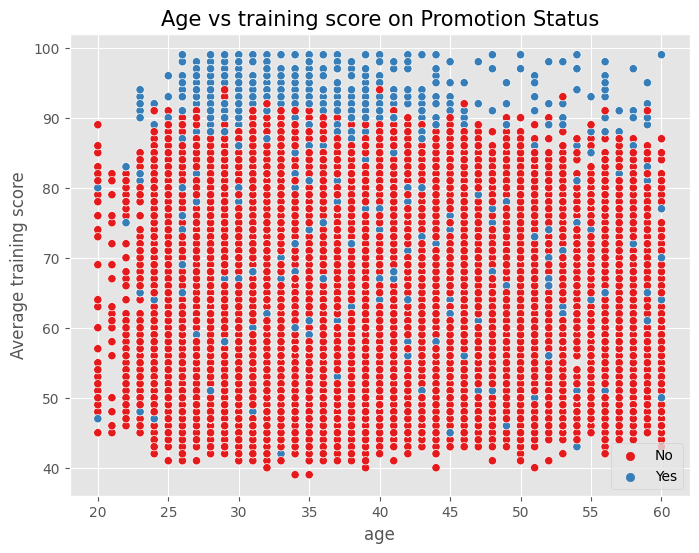

In [ ]:
# age vs training score on promotion status
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='avg_training_score',hue='is_promoted')

plt.title('Age vs training score on Promotion Status', fontsize=15)
plt.xlabel('age')
plt.ylabel('Average training score')
plt.legend(loc='lower right')

plt.show()

Although not so obvious, there is evidence to suggest that people between the age of 25 and 45 were big beneficiries of promotions compared to people who were older that 45 years old.

## **RECOMMENDATIONS**

1. **Invest in Training and Skill Development**:
   - Prioritize comprehensive training programs for employees.
   - Cover relevant skills and knowledge areas for each department.
   - Equip employees with necessary tools for excellence.
   - Boost chances of promotion and contribute to organizational growth.

2. **Performance Management and KPIs**:
   - Establish robust performance management system.
   - Conduct regular assessments and feedback sessions.
   - Provide clear, achievable KPIs and necessary resources.
   - Align individual performance with organizational goals.

3. **Recognition and Awards**:
   - Foster culture of recognition and appreciation.
   - Implement award programs for outstanding performance.
   - Motivate employees and create positive work environment.

4. **Referral Programs**:
   - Actively encourage employee referrals for open positions.
   - Introduce structured referral program with incentives.
   - Strengthen employee engagement and recruitment success.

5. **Recruitment Channels**:
   - Assess and optimize various recruitment channels.
   - Monitor channel performance and allocate resources accordingly.
   - Ensure recruitment efforts target highest quality candidates.

6. **Departmental Focus**:
   - Allocate extra resources and support to high-performing departments.
   - Implement targeted training, mentorship, and specialized initiatives.
   - Foster innovation and excellence in Technology, Analytics, Operations, and Procurement.

7. **Feedback and Development Plans**:
   - Provide regular feedback on performance and areas for improvement.
   - Create personalized development plans for employees.
   - Empower individuals to take ownership of their professional growth.

8. **Transparency and Communication**:
   - Maintain clear communication on promotion criteria and expectations.
   - Provide employees with a roadmap for career advancement.
   - Build trust, enhance satisfaction, and promote engagement.

9. **Mentorship and Coaching**:
   - Implement formal mentorship program for knowledge transfer and skill development.
   - Experienced employees mentor and support junior staff.
   - Promote continuous learning and collaboration among employees.

10. **Performance-Based Incentives**:
    - Introduce incentive system tied to performance metrics.
    - Recognize and celebrate individual contributions.
    - Foster culture of accountability and high performance.